### Seminar #5. Regression

Agenda
- Sci-kit learn
- Linear regression
- Gradient descent
- Ridge regression

- Random Forest

- Band gap dataset 




### Part 1. Linear regression

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


### Task 1
The solution for a linear regression problem is given by the following formula:
$W = (X^TX)^{-1}X^Ty$

Note: Don't forget to append bias vector to $x$ matrix

Compare your solution with scipy.stats.linregress method

In [141]:

def solve(x, y):
    """
    This function finds best fit parameters for a linear regression problem

    Params:
    ------
    X: np.array
        feature matrix

    y: np.array
        labels

    Returns:
    -------
    Best fit parameters
    
    """
    m = len(x)
    bias_vector = np.ones((m, 1))
    X = np.reshape(x, (m, 1))
    X = np.append(bias_vector, X, axis=1)

    ### your code ###
    


x = np.linspace(10, 30, 100)
y = 3 * x + 50 + np.random.normal(0,  10.0, len(x))

W = solve(x, y)


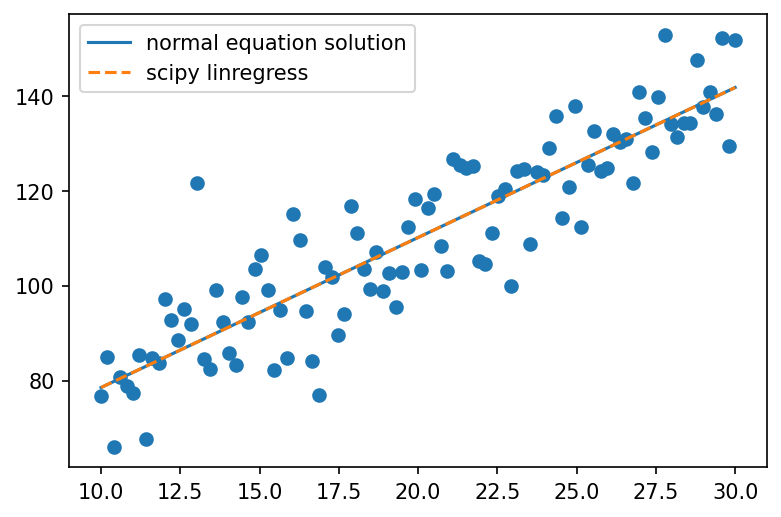

In [142]:
def line(x, w0, w1):
    return w0 + x * w1
res = linregress(x, y)
plt.figure(dpi = 150)
plt.plot(x, line(x, *W), label = 'normal equation solution')
plt.plot(x, res.slope * x + res.intercept,  label = 'scipy linregress', linestyle = '--')
plt.scatter(x, y)
plt.legend()

#### Task 2: MSE
Write a function that calculates mean squared error. Calculate the MSE error for the model obtained in Task #1.


In [144]:
def MSE(y_pred, y_true):

    pass 


#### Task #3: Gradient descent

Implement gradient descent algorithm. Compare obtained model with the normal equation solution.

![bg](https://media.geeksforgeeks.org/wp-content/uploads/Cost-Function.jpg)

In [126]:
def h(X, theta):
    pass


def J(X, y, theta):
    pass


m = len(x)
bias_vector = np.ones((m, 1))
X = np.reshape(x, (m, 1))
X = np.append(bias_vector, X, axis=1)
theta = np.zeros(2)

# gradient descent step
def step(X, y, theta, lr): 
    """
    Gradient descent step
    Params
    ------
    X: np.array
        feature matrix
    y: np.array
        labels
    lr: float
        learning rate

    Returns
    -------
    updated theta parameters
    """

    pass


theta_current = np.zeros(2)
costs = []
for i in range(100000):
    theta_current = step(X, y, theta_current, 0.001)
    costs.append(J(X, y, theta_current))
    

In [ ]:
def line(x, w0, w1):
    return w0 + x * w1
res = linregress(x, y)

fig, (ax1, ax2) = plt.subplots(dpi = 150, ncols = 2)
ax1.plot(x, line(x, *theta_current), label = 'gradient descent')
ax1.plot(x, res.slope * x + res.intercept,  label = 'scipy linregress', linestyle = '--')
ax1.scatter(x, y)
ax1.legend()
ax1.set_xlabel('X')
ax1.set_ylabel('y')

ax2.plot(costs)
ax2.set_ylabel('MSE')
ax2.set_xlabel('Gradient descent interation')
ax2.set_yscale('log')
plt.tight_layout()

In [ ]:
MSE(x, line(x, *theta_current)), MSE(x, line(x, res.intercept, res.slope))

### Part 2. Sklearn

In [385]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('data/eg_double_perovskites.csv')
data.info()

In [387]:
# drop metals
data = data[data.Insulator == 1]

In [388]:
# drop non-numerical data
X = data.drop(['functional group', "A", "A'", "B'", "PBE band gap", "Bi"], axis = 1) # features
y = data['PBE band gap'] # label (target)

In [389]:
# split data into train and test subsamples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [390]:
# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

[Feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html) through standardization, also called Z-score normalization, is an important preprocessing step for many machine learning algorithms. It involves rescaling each feature such that it has a standard deviation of 1 and a mean of 0


![bg](https://media.licdn.com/dms/image/C4E12AQFPqF6qfXYOvQ/article-cover_image-shrink_600_2000/0/1624324925880?e=2147483647&v=beta&t=C5ghUcvwlIFvEqyfLrB5bb4cL5z4mFYwQxzZscULq8c)

- Scaling guarantees that all features are on a comparable scale and have comparable ranges

- Algorithm performance improvement: When the features are scaled, several machine learning methods, including gradient descent-based algorithms, distance-based algorithms (such k-nearest neighbours), and support vector machines, perform better or converge more quickly

- Preventing numerical instability: Numerical instability can be prevented by avoiding significant scale disparities between features. 

- Without scaling, bigger scale features could dominate the learning, producing skewed outcomes


https://www.geeksforgeeks.org/ml-feature-scaling-part-2/

![bg](https://media.licdn.com/dms/image/C4D12AQGQecHw_HVgWg/article-cover_image-shrink_720_1280/0/1520101785920?e=2147483647&v=beta&t=D8LwZVwrXHmbOsR4KLSKkTc_88ZQnT38pCxk8EKpKcE)

In [ ]:
# define model
model = Ridge(alpha = 10.0)

# fit model on train data
model.fit(X_train_scaled, y_train)

In [ ]:
# make predictions
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [ ]:
fig, ax = plt.subplots(dpi = 150, figsize = (3, 3))

ax.scatter(y_test, y_pred)
ax.plot(y_test, y_test)
ax.set_xlabel('True label')
ax.set_ylabel('Prediction')

MSE(y_test, y_pred)

In [394]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=20, random_state=42)

# feature scaling is not required for decision tree model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
MSE(y_pred, y_test)

In [ ]:
fig, ax = plt.subplots(dpi = 150, figsize = (3, 3))

ax.scatter(y_test, y_pred)
ax.plot(y_test, y_test)
ax.set_xlabel('True label')
ax.set_ylabel('Prediction')

MSE(y_test, y_pred)

As you can see, Random Forest performs much better than Ridge Regression. The possible explanation is that the relationship between the features and the target property is non-linear. Consider Kernel Ridge regression for further comparison.

In [ ]:
abs(y_pred - y_test).mean()

from sklearn.metrics import r2_score


r2_score(y_test, y_pred)

### Hyperparameters optimization

So far, we used the model with a predefined hyperparameters (such as n_estimators). However, these should be optimized to get a better performance.

![bg](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [ ]:
from sklearn.model_selection import KFold
from tqdm import tqdm

kf = KFold(n_splits=5)
mse_models = []
n = np.array([1, 5, 10, 20, 30, 40, 50, 75, 100, 200, 400, 500])
for n_estimators in tqdm(n):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    mse_kfold = []
    for i, (train_index, val_index) in enumerate(kf.split(X_train)):
        X_train_inner = X_train.iloc[train_index]
        y_train_inner = y_train.iloc[train_index]
        X_val_inner = X_train.iloc[val_index]
        y_val_inner = y_train.iloc[val_index]
        
        model.fit(X_train_inner, y_train_inner)
        preds = model.predict(X_val_inner)
        mse_kfold.append(MSE(preds, y_val_inner))
    mse_models.append(np.mean(mse_kfold))

In [ ]:
plt.figure(dpi = 150)
plt.plot(n, mse_models)
plt.xlabel('MSE')
plt.xlabel('n_estimators')
plt.yscale('log')


n_estimators = 500 yields the best 5-fold cross validation score (may vary depending on the random_state)

However, it can be seen that the MSE does not change significantly for n_estimators > 100. So, in reality, it would be cost effective to use a smaller number of estimators if no dramatic gain in scores is observed.

In [ ]:
mse_models = np.array(mse_models)
n[mse_models == mse_models.min()]

In [413]:
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [ ]:
fig, ax = plt.subplots(dpi = 150, figsize = (3, 3))

ax.scatter(y_test, y_pred)
ax.plot(y_test, y_test)
ax.set_xlabel('True label')
ax.set_ylabel('Prediction')

np.sqrt(MSE(y_test, y_pred))  # root mean squared error of Eg prediction

So we have an RMSE of 0.4 eV. Is that a good result? We can compare this result with the baseline predictor, which always predicts a median of the training data set.

In [ ]:
baseline_prediction = np.mean(y_train)

np.sqrt(MSE(y_test, baseline_prediction)) 

The error is twice as smaller in our model compared to the baseline predictor